In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
original_train_df = pd.read_csv("../data/train_data.csv")
day_list_df = pd.read_csv("../data/SalesPointsV1.csv")

In [6]:
original_train_df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [7]:
category_itemList_map = original_train_df.groupby(["CategoryCode"]).agg(list)[["ItemCode"]]
category_itemList_map = category_itemList_map.to_dict()['ItemCode']

In [13]:
for _key in category_itemList_map.keys():
    print(_key,len(category_itemList_map[_key]))
    # print(_key,category_itemList_map[_key])

category_1 6841
category_2 9203
category_3 2360
category_4 1517


In [9]:
def category_wise_graph(category_map):
    for __key in category_map.keys():
        print(__key)
        draw_multi_ts_graph(category_map[__key][:4])


In [10]:
def draw_multi_ts_graph(lis_item_codes):
    for _it_co in lis_item_codes:
        product_series = day_list_df.loc[day_list_df["ItemCode"] == _it_co].iloc[0]
        print(product_series["DailySales"])

In [11]:
category_wise_graph(category_itemList_map)

category_1
[6, 6, 8, 1, 7, 7, 0, 13, 3, 4, 2, 1, 0, 3, 14, 6, 0, 7, 1, 10, 3, 2, 19, 6, 1, 1, 4, 0, 6, 18, 11, 0, 8, 7, 3, 24, 1, 1, 9, 2, 1, 3, 19, 23, 6, 0, 4, 4, 1, 3, 4, 4, 4, 0, 26, 2, 8, 4, 4, 3, 10, 0, 7, 27, 1, 8, 0, 10, 1, 15, 0, 55, 9, 0, 17, 1, 4, 12, 13, 0, 6, 1, 21, 29, 15, 18, 6, 10, 7, 8, 6, 28, 2, 6, 5, 1, 3, 1, 8, 34, 5, 1, 3, 5, 7, 8, 4, 6, 1, 1, 0, 0, 7, 20, 0, 6, 3, 3, 0, 6, 0, 19, 5, 3, 8, 14, 6, 17, 3, 1, 3, 2, 6, 9, 31]
[8, 3, 9, 2, 1, 2, 4, 11, 11, 4, 7, 4, 7, 3, 2, 8, 1, 4, 6, 4, 3, 3, 4, 10, 7, 2, 4, 4, 6, 3, 5, 5, 3, 4, 9, 1, 2, 3, 4, 1, 3, 1, 3, 9, 2, 5, 2, 9, 0, 3, 7, 4, 11, 6, 6, 6, 7, 7, 1, 2, 3, 9, 5, 16, 8, 6, 3, 11, 0, 4, 3, 4, 6, 4, 13, 6, 10, 3, 10, 10, 10, 4, 5, 9, 3, 13, 2, 4, 4, 2, 5, 10, 9, 4, 10, 3, 4, 8, 8, 5, 11, 4, 6, 3, 6, 5, 4, 4, 4, 3, 11, 7, 7, 6, 3, 3, 4, 16, 6, 3, 8, 11, 5, 5, 3, 7, 3, 2, 8, 4, 8, 1, 6, 9, 1, 3]
[11, 5, 2, 6, 5, 0, 9, 1, 36, 5, 5, 20, 6, 3, 2, 7, 1, 0, 5, 1, 17, 30, 1, 0, 2, 2, 0, 1, 2, 0, 18, 17, 18, 5, 2, 2, 18, 10, 9

## Tharindu did this shit:

In [6]:
#category2
d1= [7, 4, 3, 1, 1, 2, 3, 2, 7, 1, 4, 6, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 8, 2, 11, 1, 2, 1, 2, 2, 5, 1, 1, 2, 5, 7, 11, 3, 5, 2, 3, 1, 5, 2, 12, 3, 7, 15, 13, 1, 1, 4, 2, 7, 6, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 3, 24, 4, 1, 1, 4, 3, 2, 1, 1, 2, 1, 2, 1, 2, 8, 4, 2, 1, 3, 2, 1, 2, 1, 1]
d2= [5, 2, 1, 5, 3, 1, 1, 1, 3, 5, 4, 5, 3, 3, 1, 2, 2, 3, 1, 1, 3, 2, 1, 2, 1, 4, 4, 1, 1, 1, 4, 6, 3, 1, 2, 5, 2, 2, 2, 3, 3, 6, 5, 3, 1, 1, 5, 1, 4, 5, 7, 1, 4, 3, 3, 10, 2, 3, 6, 1, 1, 3, 11, 3, 4, 5, 4, 9, 2, 2, 4, 1, 1, 4, 3, 3, 1, 2, 5, 7, 5, 5, 3, 8, 3, 8, 1, 2, 1, 3, 4, 3, 11, 5, 1, 1, 2, 2, 4, 3, 1, 2, 5, 2, 6, 2, 2, 2, 3, 5, 3, 2, 5, 3, 1, 2, 2, 1, 1, 3, 2]
d3= [5, 1, 2, 1, 2, 1, 1, 4, 1, 4, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 6, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 6, 2, 1, 2, 1, 3, 1, 2, 2, 3, 4, 2, 5, 7, 3, 1, 1, 1, 1, 5, 2, 1, 1, 6, 1]


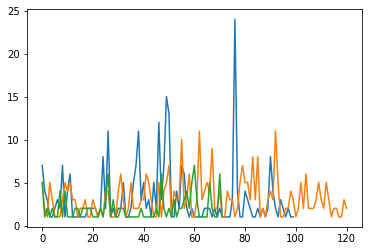

In [7]:
plt.plot(d1)
plt.plot(d2)
plt.plot(d3)